<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-rdvicen1/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Yahoo finance](https://finance.yahoo.com/)

In [ ]:
!pip install -U yfinance pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.6 MB/s 
     |████████████████████████████████| 109 kB 9.7 MB/s 
     |████████████████████████████████| 112 kB 56.8 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 110 kB 16.4 MB/s 
     |████████████████████████████████| 4.1 MB 53.5 MB/s 
     |████████████████████████████████| 128 kB 45.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4

# Datos

Valor de cierre del IBEX

instala libreria

pip install yahoo finance previo para poder importar

In [ ]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [ ]:
yf.pdr_override() # <== that's all it takes :-)
data = pdr.get_data_yahoo("^IBEX", start="2020-01-01", end="2020-10-30")

[*********************100%***********************]  1 of 1 completed


## [Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)

El 97% de los valores de un activo se encuentran entre un máximo de $+1.96 \times  \sigma(20\ valores\ anteriores)$ y $-1.96 \times \sigma(20\ valores\  anteriores)$ centrados en la media de los 20 valores anteriores.

se hace la media de cada 20 valores, se va moviendo un elemento cada vez, y se obtiene la media los 20 valores. -> rolling(20).mean()

*1,96 por lo que indica el texto

df va a tener una columna con R, otra con M, otra +M, -M

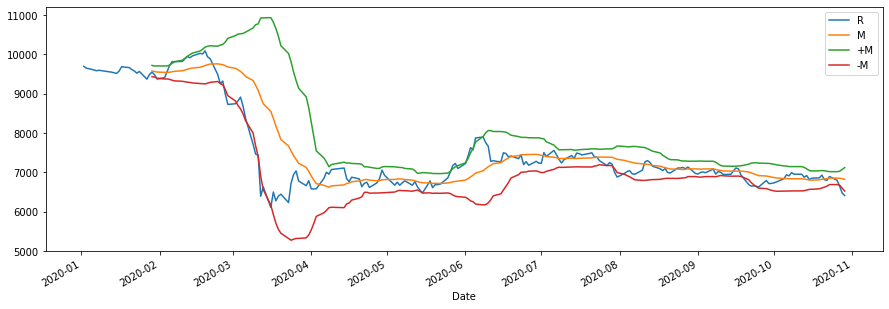

In [ ]:
d=pd.DataFrame()
d['R']=data['Close']
d['M']=data['Close'].rolling(20).mean()
d['+M']=d['M']+data['Close'].rolling(20).std()*1.96
d['-M']=d['M']-data['Close'].rolling(20).std()*1.96
d.plot(figsize=(15,5))

esto es necesario para poder predecir

## Transformación de los datos para un problema de regresión / clasificación
- Datos originales $[c_0,\ldots,c_T]$
- Datos transformados:$[[c_0,\ldots,c_{19}],c_{20}],\ldots,[[c_{T-20},\ldots,c_{T-1}],c_T]$.

transformar en datos de forma predictivas

datos compuestos por elementos dependientes e independientes

Hay que transformar serie continua de 20 datos anterior a elementos anteriores(20) + 1

In [ ]:
def windowData(s,window_input=1,window_output=1,step=1):
  X=[]
  Y=[]
  #Datos necesarios
  dn=window_input+window_output
  #Calcular cuantos pasos completos podemos realizar
  #sin contar el último bloque [input,output]
  ld=int((len(s)-dn)/step)*step
  for i in range(len(s)-ld-1,len(s)-dn,step):
    X.append(s[i:i+window_input])
    Y.append(s[i+window_input:i+dn])
  return X,Y

devolvera x e y

divider tamaño completo de nuestros datos/dn(ventana de entrada y salida)

x desde donte toque hasta el tamaño de i, x no tiene el valor i+window_input(este no esta incluido)

y empieza en i+window_input porque ese valor si lo coge

scalada datos

poner values necesarios para k sea vector

dimension con funcion shape-> ,n. de elementos
necesitamos que cada elemento tenga su propia dimension ->(1)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Escalanos los datos
dScale = MinMaxScaler()
ldatos=d['R'].values #ldatos.shape=(len(d['R']),)
ldatos=ldatos.reshape((len(d['R']),1)) #ldatos.shape=(len(d['R']),1)
dScale.fit(ldatos)
ldatos=dScale.transform(ldatos).reshape((len(ldatos),))

#Contruimos los conjunto de datos X e Y
X,Y=windowData(ldatos,window_input=20,window_output=1,step=1)
X=np.array(X)
Y=np.array(Y)

#partmos los conjuntos en entranamiento y test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,shuffle=False, random_state=42)

queremos como entrada input =20, salida de 1, y de paso 1 a 1

# PERCEPTRON

## Librerías necesarias 
- [Keras](https://keras.io/)
- [Tensorflow](https://www.tensorflow.org/)

librerias tensorflow mas popular para redes neuronales

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import metrics

## Definir la Red

Definimos nuestro perceptron con las siguientes capas (**layers**)
- Modelo secuencial [Sequential](https://keras.io/api/models/sequential/)
- Capa de entrada: [Input](https://keras.io/api/layers/core_layers/input/)
- Capa Densa: [Dense](https://keras.io/api/layers/core_layers/dense/) 

1.input cada uno de los parametros de entrada -> 20

2.salida de esa capa va a ir a una capa densa-> 30 neuronas(se le asigna estos porque si); funcion de activacion relu,

3.Salida obtendremos 30, se mete en capa densa, misma activacion

4.Ultima capa de 1 neurona; sigmoide ya que se ha normalizado los valores de entrada entre 0 y 1 antes

In [ ]:
perceptron=Sequential()
perceptron.add(Input(20))
perceptron.add(Dense(30,activation='relu'))
perceptron.add(Dense(30,activation='relu'))
perceptron.add(Dense(1, activation='sigmoid'))
perceptron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                630       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,591
Trainable params: 1,591
Non-trainable params: 0
_________________________________________________________________


con esto ya esta construido un perceptron

falta compilar para que pueda ejecutarse

## Compilar la red
Definido el **perceptrón** lo tendremos que compilar indicando:
- Que optimizador utilizar.
- Que función de error (pérdida o **loss**).
- Que métricas observar cuando lo entrenemos.

Función [**compile**](https://keras.io/api/models/model_training_apis/#compile-method)

compilar -> construir tensor y elements necesarios para que pueda ejecutarse

se utiliza perceptron creado antes

optimizer = adam; hay muchos

loss -> percepcion error cuadratico errorses

In [ ]:
# compilamos el modelo
perceptron.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        metrics.MeanSquaredError(name='my_mse'),
        metrics.AUC(name='my_auc'),
    ]
)

siguiente fase ajustar fit (aprendizaje)

## Aprender los parámetros

Realizamos el **aprendizaje** indicando:
- Los conjuntos de datos a utilizar **X** e **Y**
- Que proporción de los datos utilizaremos para validar el modelo
- El tamaño del conjunto **batch**
- El número de **épocas** a realizar

Método [**fit**](https://keras.io/api/models/model_training_apis/#fit-method)

Primero datos de entrenamiento, despues separacion dato entrenamiento/test

batch cada cuantos datos quieres que haga el ejuste y numero de epocas que quieres que haga. Cada epoca recorre todos los datos.

verbose= que no informe

In [ ]:
history=perceptron.fit(X,Y,validation_split=0.33, batch_size=10,epochs=300,verbose=0)

In [ ]:
history.history.keys()

dict_keys(['loss', 'my_mse', 'my_auc', 'val_loss', 'val_my_mse', 'val_my_auc'])

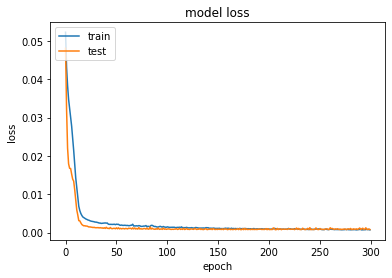

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

tanto train como test estan bien ajustados

## Utilizar la red
Utilizar el perceptron aprendido con el método [**predict**](https://keras.io/api/models/model_training_apis/#predict-method)

se coge parte de entrenamiento y de test

xtrain seria vector de 20 valores

In [ ]:
Y0=perceptron.predict(X_train)
Y1=perceptron.predict(X_test)

2/2 [==============================] - 0s 5ms/step


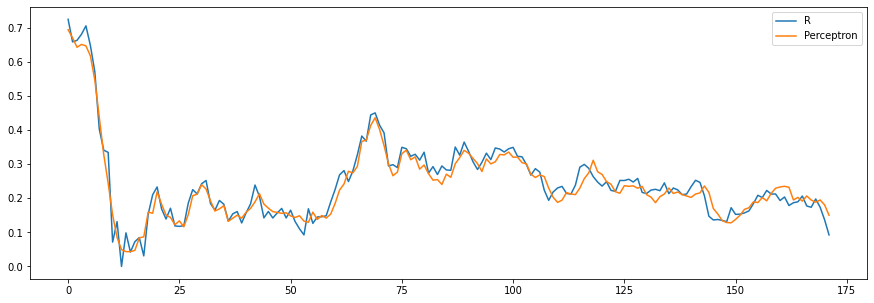

In [ ]:
r=pd.DataFrame(np.vstack((Y_train,Y_test)),columns=['R'])
r['Perceptron']=pd.DataFrame(np.vstack((Y0,Y1)))
r.plot(figsize=(15,5))

tiende a infravalorar y a partir del valor 100 y pico tienede a adelantarse un  poco del valor real


para corregirlo se utilizaria menos valores, a ver si con la ventana mas pequeña se puede ajustar mas la percepcion

## Salvar y Cargar Redes
- Salvar mediante el método [**save**](https://keras.io/api/models/model_saving_apis/#save-method).
- Recuperar un modelo con el método [**load_model**](keras.models.load_model).

In [ ]:
perceptron.save('perceptron.h5')
otro_perceptron=keras.models.load_model('perceptron.h5')

h5 fichero jerarquico, pensado para almacenar tensores de forma jerarquica